In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=iphone+x&_sacat=0&_odkw=iphone+xmas&_osacat=0"
n = range(1,3)
for num in n:
    url =f'{base_url}{num}'
    response =  requests.get(url)
    content = BeautifulSoup(response.text, 'html.parser')
    product_d = []
    
    products = content.find_all("li", {"class": "s-item s-item__pl-on-bottom"})
    for product in products:
        name = product.find("span", {'role': 'heading'})
        f_name =name.text.strip()
        if f_name =="Shop on eBay":
            continue
        

        price = product.find("span", {'class': 's-item__price'})
        unfiltered = price.text.strip()
        match = re.search(r'(\d+\.\d+)', unfiltered)
        if match:
            f_match = match.group(1) if match else 0.0
        
        rating = product.find("span",{"class": 's-item__seller-info-text'})
        f_rating = "N/A"
        if rating:
            unf_rating =rating.text.strip()
            r_match = re.search(r'(\d+(\.\d+)?)%', unf_rating)
            f_rating = r_match.group(1)
        img = product.find('img')
        if img:
            image = img.get('src')
        
        product_d.append({"name":f_name,
                "price(USD)": f_match,
                "rating": f_rating,
                "image": image})

In [4]:
df = pd.DataFrame(data= product_d)
df.to_csv('asign.csv')

In [6]:
df.to_excel('asign.xlsx')

In [7]:
df['price(USD)'] = pd.to_numeric(df['price(USD)'], errors='coerce').round(2)
df['price(NGN)'] = (df['price(USD)'] * 1488).round(0).astype(int)

pd.set_option('display.float_format', '{:.2f}'.format)

df.to_csv('asign.csv', index=False)
df.to_excel('asign.xlsx', index=False)
df

,name,price(USD),rating,image,price(NGN)
0,Apple iPhone X (iPhone 10) 64GB 256GB Unlocked...,162.91,98.8,https://i.ebayimg.com/thumbs/images/g/TcIAAOSw...,242410
1,Apple iPhone X 64GB &256GB Factory Unlocked Sp...,159.99,97.2,https://i.ebayimg.com/thumbs/images/g/YQYAAOSw...,238065
2,Apple iPhone X 64GB 256GB Factory Unlocked AT&...,158.99,97.9,https://i.ebayimg.com/thumbs/images/g/yOsAAOSw...,236577
3,Apple iPhone X | XR | XS | XS Max - 64GB 128GB...,124.95,99.4,https://i.ebayimg.com/thumbs/images/g/4d0AAOSw...,185926
4,【Lowest Price Online】Apple iPhone X 64G/256G- ...,103.69,100,https://i.ebayimg.com/thumbs/images/g/zpIAAOSw...,154291
...,...,...,...,...,...
70,2 X Apple iPhone 12 - Sold As It Is/Parts - N...,100.64,98.9,https://i.ebayimg.com/thumbs/images/g/fxsAAOSw...,149752
71,Apple iPhone 8 Factory Unlocked 64GB 128GB 256...,113.99,97.9,https://i.ebayimg.com/thumbs/images/g/4IMAAOSw...,169617
72,Apple iPhone 12 Mini 128GB Unlocked Smartphone...,244.95,98.6,https://i.ebayimg.com/thumbs/images/g/amoAAOSw...,364486
73,Apple iPhone XS 64GB Unlocked Smartphone - Exc...,178.95,98.6,https://i.ebayimg.com/thumbs/images/g/8bwAAOSw...,266278


<Axes: xlabel='price(NGN)'>

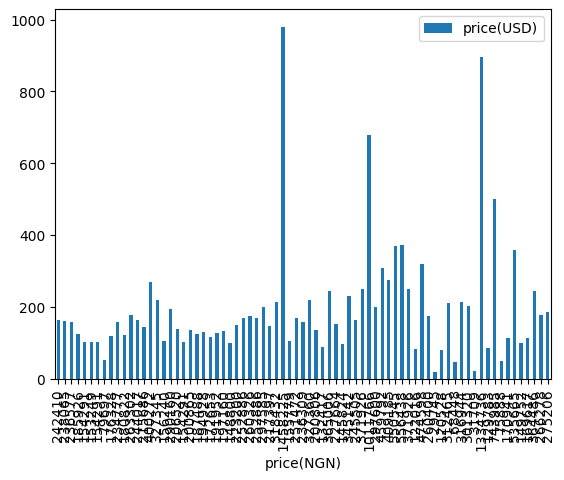

In [8]:
df.plot.bar(x='price(NGN)', y='price(USD)')

In [9]:
averange_usd = df['price(USD)'].mean()
average_ngn = df['price(NGN)'].mean()

print(f"The average price in USD is ${averange_usd.round(1)}")
print(f'The average price in naira #{average_ngn.round(1)}')

The average price in USD is $195.2
The average price in naira #290480.3


<Axes: xlabel='rating'>

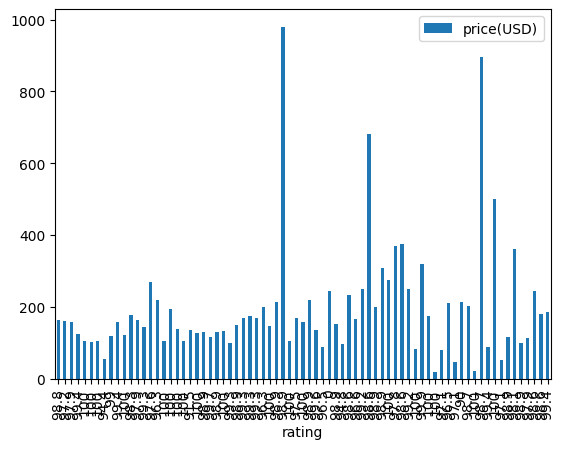

In [10]:
df.plot.bar(x='rating', y='price(USD)')

In [11]:
df['rating'].describe()

count      75
unique     28
top       100
freq       19
Name: rating, dtype: object

<Axes: xlabel='rating'>

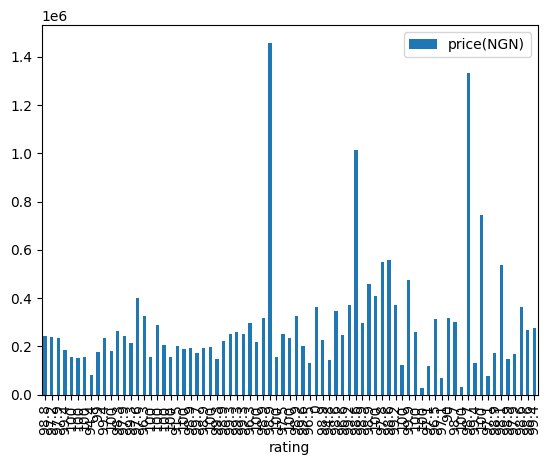

In [12]:
df.plot.bar(x='rating', y='price(NGN)')

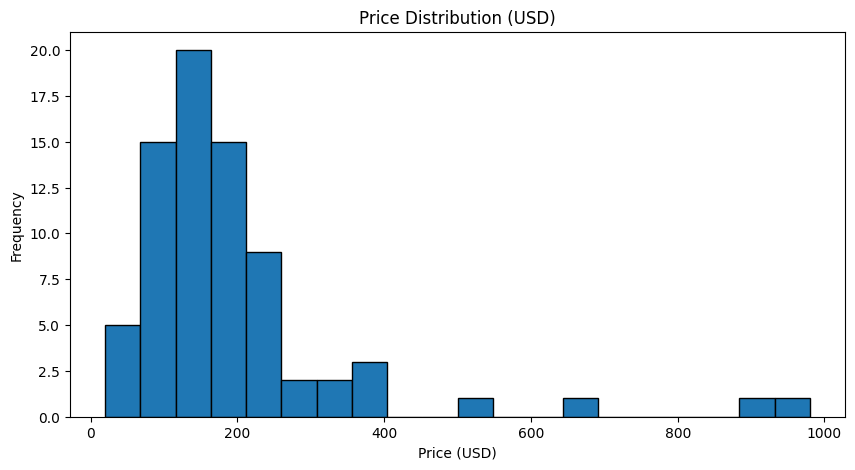

In [13]:
plt.figure(figsize=(10, 5))
df['price(USD)'].hist(bins=20, edgecolor='black')
plt.title('Price Distribution (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

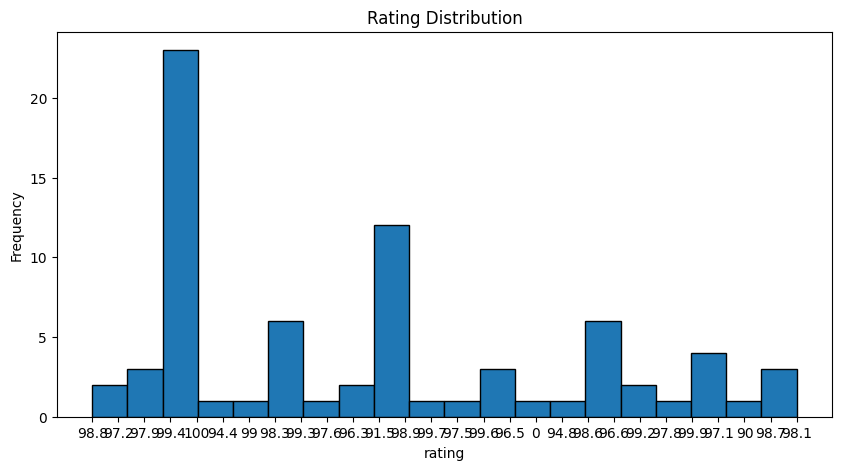

In [14]:
plt.figure(figsize=(10, 5))
df['rating'].hist(bins=20, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()